<a href="https://colab.research.google.com/github/CIC-Research/Data-Science-Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network
### CIC Data Science Project
By: Neidy Malaga



#### Step 1: Beginning Setup

For our project, we will focus on the 'Walmart.csv' dataset. We will cluster and classify at least two topics. These two topics are Purchase Amount over Product Category and Gender over Purchase Amount. The purpose of the project is to see if the classification model can find any patterns between how Purchase Amounts are grouped to certain Product Categories and how Gender affects Purchase Amounts.

We start by using pandas to read our data from an Excel file and display it to prove it was read well. We then clean up the data and separate them into two datasets for convenience.

In [43]:
import pandas as pd

#try/catch for pd.read_csv
try:
    Walmart_Data = pd.read_csv('walmart.csv')
    #changing data types to conserve memory, implementing binary
    Walmart_Data['Purchase'] = Walmart_Data['Purchase'].astype('uint16')
    Walmart_Data['Product_Category'] = Walmart_Data['Product_Category'].astype('uint8')
    Walmart_Data['Gender'] = Walmart_Data['Gender'].map({'M': 0, 'F': 1})
    
    #seperating into individual sets 
    Purchase_PC_Data= Walmart_Data[['Purchase','Product_Category']]
    Gender_Purchase_Data = Walmart_Data[['Gender','Purchase']]
    
    #checking to see if datasets have read csv file successfully
    print(f'First set is empty: {Purchase_PC_Data.empty}')
    print(f'Second set is empty: {Gender_Purchase_Data.empty}')
except FileNotFoundError:
    print('File not found')
except pd.errors.EmptyDataError:
    print('Empty Data')
except pd.errors.DataError:
    print('Dara Error')
except pd.errors.ParserError:
    print('Parser Error')


First set is empty: False
Second set is empty: False


#### Step 2: Scatterplot Visual
Let's start by showing the scatterplot to identify the independent and dependent variable. Since we are measuring Purchase Amount over Product Category, Purchase Amount will be the explanatory value (x-val) and Product Category will be the response value (y-val). In addition, Purchase Amount over Gender will be denoted as the explanatory value over the response value. 

The following code block will show the scatterplot. Based on the scatterplot, we can see that the first graph has a few outliers to the right and the information is spread out. We can imply that 2-3 clusters can cover the data. 

For the second graph, the data is more clustered to the left and the scatterplot shows a few outliers to the right. Since they are split between two groups, we can assume that we will only need 2 clusters. 

We will use this information to confirm our methods in Step 3 when we perform a cluster.


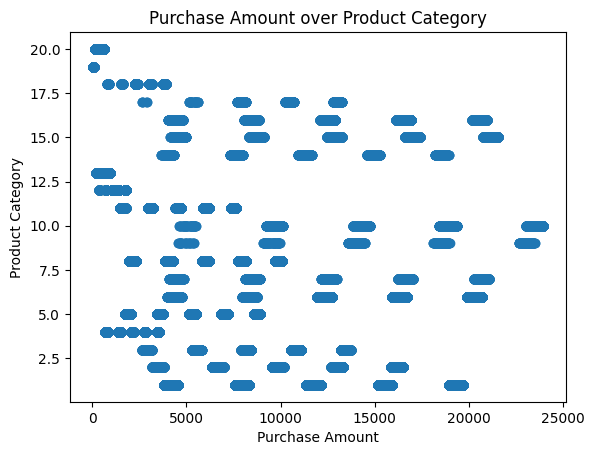

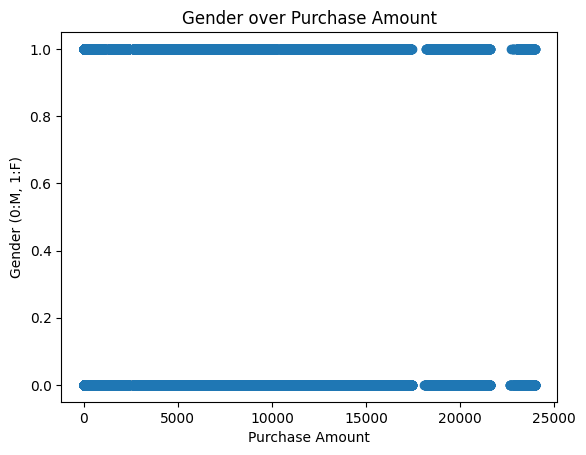

In [47]:
import matplotlib.pyplot as plt

#create scatterplot, annotate scatterplot, show scatterplot
plt.scatter(Purchase_PC_Data['Purchase'], Purchase_PC_Data['Product_Category'])
plt.xlabel('Purchase Amount')
plt.ylabel('Product Category')
plt.title('Purchase Amount over Product Category')
plt.show()

plt.scatter(Gender_Purchase_Data['Purchase'], Gender_Purchase_Data['Gender'])
plt.xlabel('Purchase Amount')
plt.ylabel('Gender (0:M, 1:F)')
plt.title('Gender over Purchase Amount')
plt.show()

#### Step 3: Clustering Data
In order to cluster data, we will use K-Means algorithm.

Credit: https://www.w3schools.com/python/python_ml_k-means.asp

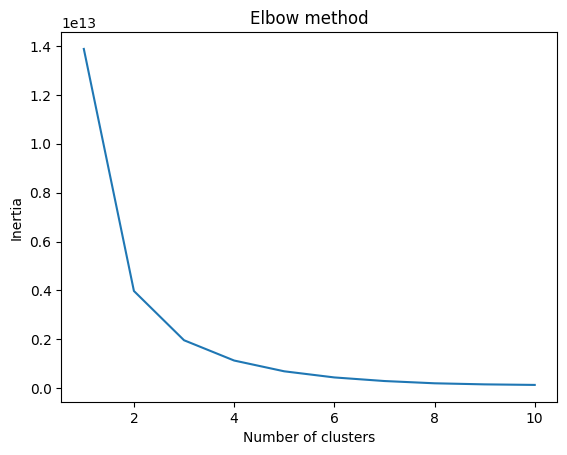

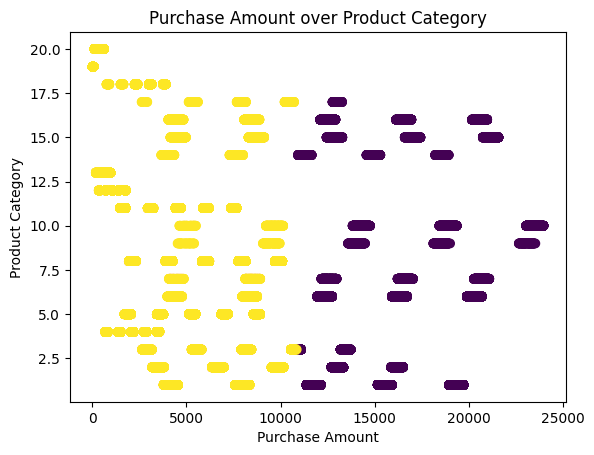

In [51]:
from sklearn.cluster import KMeans

#Elbow Method
inertia = []

for index in range(1,11):
    kmeans = KMeans(n_clusters=index)
    kmeans.fit(Purchase_PC_Data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(Purchase_PC_Data)

plt.scatter(Purchase_PC_Data['Purchase'], Purchase_PC_Data['Product_Category'], c=kmeans.labels_)
plt.xlabel('Purchase Amount')
plt.ylabel('Product Category')
plt.title('Purchase Amount over Product Category')
plt.show()

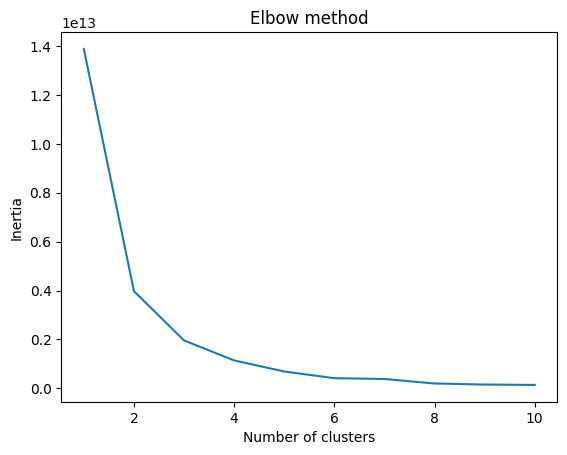

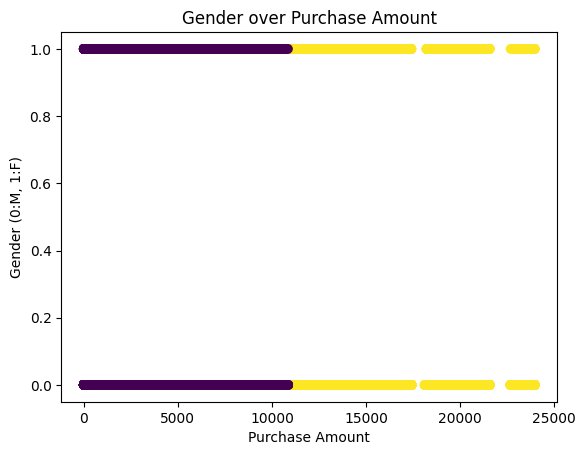

In [52]:
#Elbow Method
inertia.clear()

for index in range(1,11):
    kmeans = KMeans(n_clusters=index)
    kmeans.fit(Gender_Purchase_Data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(Gender_Purchase_Data)

plt.scatter(Gender_Purchase_Data['Purchase'], Gender_Purchase_Data['Gender'], c=kmeans.labels_)
plt.xlabel('Purchase Amount')
plt.ylabel('Gender (0:M, 1:F)')
plt.title('Gender over Purchase Amount')
plt.show()

#### Step 3: Classification



In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = Purchase_PC_Data.drop('Product_Category', axis=1)
y = Purchase_PC_Data['Product_Category']

#splits into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)
dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

print('Training Accuracy : ', accuracy_score(Y_train,dt.predict(X_train))*100)
print('Testing Accuracy : ', accuracy_score(Y_test, dt.predict(X_test))*100)


Training Accuracy :  87.45017656923923
Testing Accuracy :  86.62988346937662


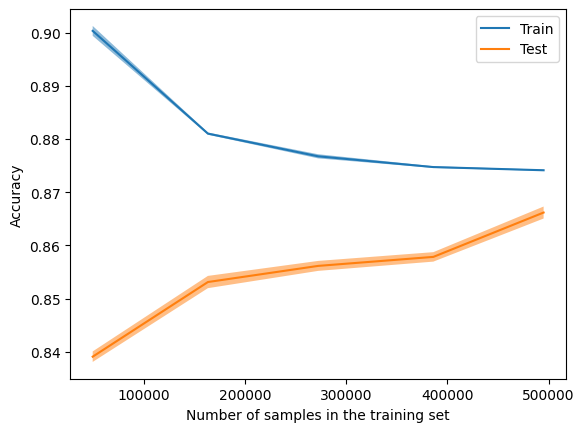

In [55]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=dt, X= x, y= y, cv = 10, train_sizes=[0.1, 0.33, 0.55, 0.78, 1.])
LC_plt = LearningCurveDisplay(train_sizes = train_sizes, train_scores = train_scores, test_scores = test_scores, score_name='Accuracy')
LC_plt.plot()

https://www.geeksforgeeks.org/understanding-logistic-regression/

Logistic Regression
Fixed :)

In [56]:
from sklearn.linear_model import LogisticRegression

x = Gender_Purchase_Data.drop('Gender', axis=1)
y =  Gender_Purchase_Data['Gender']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

print('Training Accuracy : ', accuracy_score(Y_train,lr.predict(X_train))*100)
print('Testing Accuracy : ', accuracy_score(Y_test,lr.predict(X_test))*100)


Training Accuracy :  75.24576529244138
Testing Accuracy :  75.56947297616668


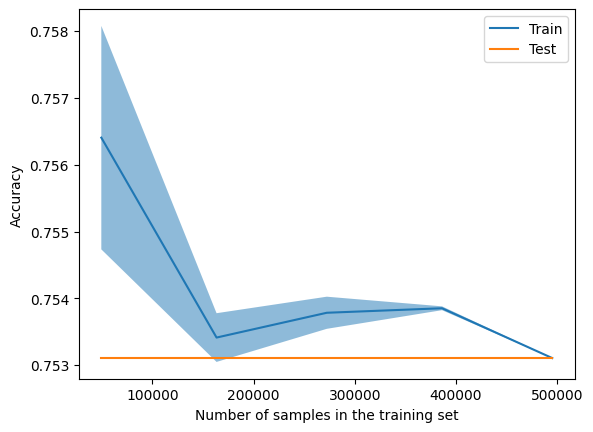

In [57]:
train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X= x, y= y, cv = 10, train_sizes=[0.1, 0.33, 0.55, 0.78, 1.])
LC_plt = LearningCurveDisplay(train_sizes = train_sizes, train_scores = train_scores, test_scores = test_scores, score_name='Accuracy')
LC_plt.plot()